<a href="https://colab.research.google.com/github/macdonrolex/python_class_20230318/blob/main/%E8%AA%B2%E7%A8%8B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#20230318

([<matplotlib.patches.Wedge at 0x7f5bb9871730>,
 [Text(1.0461621663333946, 0.3399186987098808, ''),
  Text(0.33991867422268784, 1.0461621742897658, ''),
  Text(-1.0461621902025062, 0.3399186252483017, ''),
  Text(0.3399188211458418, -1.0461621265515308, '')])

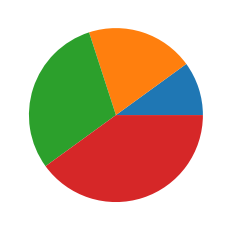

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4]
plt.pie(x)

In [ ]:
import numpy as np
x = [[0,1,2,3,4],
     [5,6,7,8,9],
     [10,11,12,13,14],
     [15,16,17,18,19],
     [20,21,22,23,24]]

y = np.array(x)
print(y[2,3])
    


13


##使用 gradio 產生使用者介面
Documentation:

* https://gradio.app/

###安裝 gradio
 


In [ ]:
!pip install gradio

### gradio的hello world程式


In [ ]:
import gradio as gr

In [ ]:
def hello(name):
  return f"Hello, {name}!"

In [ ]:
hello('Edward')

'Hello, Edward!'

In [ ]:
gr.Interface(hello, "text", "text").launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

###多個輸入，單一輸出

In [ ]:
def bmi(h, w):
  return w/h**2

In [ ]:
bmi(1.83, 80)

23.888440980620498

In [ ]:
gr.Interface(bmi,['number', 'number'], 'text').launch(share = True)

###使用圖片輸入/輸出

In [ ]:
def process(image):
  # 處理處理 image
  return image

In [ ]:
gr.Interface(process, "image", "image").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
gr.Interface(process, "webcam", "image").launch()

### 應用：使用YOLO v5做物件辨識

In [ ]:
!pip install torch

In [ ]:
import torch
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def process(image):
  image = Image.fromarray(image)
  image.thumbnail((1024, 1024))
  results = model(image, augment=True)
  results.save()
  return results.ims[0]

In [ ]:
gr.Interface(process, "image", "image").launch()

## 將 gradio 的 App 佈署到雲端

使用 https://huggingface.co/

space - create new space

### 進一步修改使用者介面

以bmi程式為例！

In [ ]:
gr.Interface(bmi, ['number', 'number'], 'text').launch()

In [ ]:
gr.Interface(bmi, ['number', 'number'], gr.Text(label="bmi")).launch()

In [ ]:
gr.Interface(bmi, [gr.Number(label="身高(m)"), 'number'], gr.Text(label="bmi")).launch()

In [ ]:
gr.Interface(bmi, [gr.Number(label="身高(m)"), gr.Number(label="體重(kg)")], gr.Text(label="bmi")).launch()

In [ ]:
gr.Interface(bmi, [gr.Number(label="身高(公尺)"), gr.Number(label="體重(公斤)")], 
             gr.Text(label="bmi"),
             title = "計算bmi").launch()

In [ ]:
gr.Interface(bmi, [gr.Number(label="身高(公尺)"), gr.Number(label="體重(公斤)")], 
             gr.Text(label="bmi"),
             title = "計算bmi",
             description = "請填入身高及體重後，點擊 submit 做運算").launch()

### 應用：輸入股票代號，輸出最後五筆股價歷史資料

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.9 MB/s eta 0:00:00


In [ ]:
import yfinance as yf

In [ ]:
def get_quotes(symbol):
  df = yf.download(symbol)
  return df.tail()

In [ ]:
gr.Interface(get_quotes, "text", gr.DataFrame()).launch()

## Scikit-Learn 簡介

### 準備資料
使用鳶尾花資料集

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data
Y = iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
len(X)

150

In [ ]:
X.shape

In [ ]:
X[0]

### 產生訓練集(Training Set)跟測試集(Testing Set)產生訓

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
len(x_train)

120

### 使用訓練模型來做分類

####使用SVM (Support Vector Machine)

In [ ]:
# 1. 載入模型
from sklearn.svm import SVC

In [ ]:
# 2. 建立模型
clf = SVC()

In [ ]:
# 3. 訓練模型
clf.fit(x_train, y_train)

SVC()

In [ ]:
# 4. 使用模型
y_predict = clf.predict(x_test)

In [ ]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
clf.score?

In [ ]:
clf.score(x_test, y_test)

1.0

#### 使用Random Forrest 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# 1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 2. 建立模型
clf = RandomForestClassifier()

In [ ]:
# 3. 訓練模型
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# 4. 評估模型準確度
clf.score(x_test, y_test)

1.0

### 應用：使用scikit-learn做股票漲跌預測

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76254400
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500


In [ ]:
df.shape

(10655, 6)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [ ]:
df.Close

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-03-13    150.470001
2023-03-14    152.589996
2023-03-15    152.990005
2023-03-16    155.850006
2023-03-17    155.000000
Name: Close, Length: 10655, dtype: float64

In [ ]:
df.Close.shift(-1)

Date
1980-12-12      0.121652
1980-12-15      0.112723
1980-12-16      0.115513
1980-12-17      0.118862
1980-12-18      0.126116
                 ...    
2023-03-13    152.589996
2023-03-14    152.990005
2023-03-15    155.850006
2023-03-16    155.000000
2023-03-17           NaN
Name: Close, Length: 10655, dtype: float64

In [ ]:
df['label'] = (df.Close - df.Close.shift(-1)) < 0

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600,False
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800,False
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000,True
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600,True
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600,True


In [ ]:
df.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099722   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094519   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087582   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089749   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092351   
...                ...         ...         ...         ...         ...   
2023-03-13  147.809998  153.139999  147.699997  150.470001  150.470001   
2023-03-14  151.279999  153.399994  150.100006  152.589996  152.589996   
2023-03-15  151.190002  153.250000  149.919998  152.990005  152.990005   
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.850006   
2023-03-17  156.080002  156.740005  154.279999  155.000000  155.000000   

       

In [ ]:
df = df.drop("2023-03-17")

In [ ]:
X = df[['Open','High','Low','Close','Adj Close','Volume']]

In [ ]:
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 使用SVC預測股市漲跌

In [ ]:
# 1. 載入模型
from sklearn.svm import SVC

In [ ]:
# 2. 建立模型
clf = SVC()

In [ ]:
# 3. 訓練模型
clf.fit(x_train, y_train)

SVC()

In [ ]:
# 4. 評估模型準確率
clf.score(x_test, y_test)

0.5124354763022055

### 應用：使用sklearn做股票漲跌預測

使用多個技術指標來協助做預測。

In [ ]:
df['ma5'] = df['Close'].rolling(window=5).mean()

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,label,ma5
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600,False,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800,False,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000,True,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600,True,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600,True,0.119420
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097987,48630400,True,0.118973
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102756,37363200,True,0.121094
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107093,46950400,True,0.126116
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112729,48003200,True,0.132031


In [ ]:
df['ma20'] = df['Close'].rolling(window=20).mean()

In [ ]:
df.head()

In [ ]:
# 移除缺失值
df = df.dropna()

#### 產生訓練集跟測試集

In [ ]:
X = df[['Open','High','Low','Close','Adj Close','Volume','ma5','ma20']]

In [ ]:
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 使用SVC或或random forest來做漲跌預測

In [ ]:
# 2. 建立模型
#clf = SVC()
clf = RandomForestClassifier()

In [ ]:
# 3. 訓練模型
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# 4. 評估模型準確率
clf.score(x_test, y_test)

0.5035260930888575